In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os


### Notes
-1 Use Spark API to get the data from the files and import them into a dataframe

### Issues
-1 36 stations are not in BikePoints API (Stations) and there is already 2 station names

In [3]:

def import_bike_data(directory):
    """
    Read all CSV files in a directory and return them as a list of Pandas dataframes.
    """
    bike_data_2019s = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            try:
                bike_data_2019 = pd.read_csv(filepath)
                bike_data_2019s.append(bike_data_2019)
                print(f"File {filename} successfully read.")
            except Exception as e:
                print(f"Error reading file {filename}: {e}")
    combined_bike_data_2019 = pd.concat(bike_data_2019s, ignore_index=True)
    
    return combined_bike_data_2019

In [4]:
bike_data_2019 = import_bike_data('Data Files/')
    
print(bike_data_2019)

File 179JourneyDataExtract11Sep2019-17Sep2019.csv successfully read.
File 190JourneyDataExtract27Nov2019-03Dec2019.csv successfully read.
File 176JourneyDataExtract21Aug2019-27Aug2019.csv successfully read.
File 184JourneyDataExtract16Oct2019-22Oct2019.csv successfully read.
File 193JourneyDataExtract18Dec2019-24Dec2019.csv successfully read.
File 156JourneyDataExtract03Apr2019-09Apr2019.csv successfully read.
File 171JourneyDataExtract17Jul2019-23Jul2019.csv successfully read.
File 154JourneyDataExtract20Mar2019-26Mar2019.csv successfully read.
File 159JourneyDataExtract24Apr2019-30Apr2019.csv successfully read.
File 157JourneyDataExtract10Apr2019-16Apr2019.csv successfully read.
File 165JourneyDataExtract05Jun2019-11Jun2019.csv successfully read.
File 164JourneyDataExtract29May2019-04Jun2019.csv successfully read.
File 153JourneyDataExtract13Mar2019-19Mar2019.csv successfully read.
File 170JourneyDataExtract10Jul2019-16Jul2019.csv successfully read.
File 151JourneyDataExtract27Feb201

### Review data

In [5]:
bike_data_2019

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,91113807,240,16022,11/09/2019 13:25,125,"Borough High Street, The Borough",11/09/2019 13:21,10,"Park Street, Bankside"
1,91265425,2400,15227,15/09/2019 15:39,532,"Jubilee Plaza, Canary Wharf",15/09/2019 14:59,237,"Dock Street, Wapping"
2,91210424,480,9654,13/09/2019 22:04,715,"Aylward Street, Stepney",13/09/2019 21:56,444,"Bethnal Green Garden, Bethnal Green"
3,91190653,540,3586,13/09/2019 13:55,715,"Aylward Street, Stepney",13/09/2019 13:46,444,"Bethnal Green Garden, Bethnal Green"
4,91274678,360,16132,15/09/2019 17:56,648,"Peterborough Road, Sands End",15/09/2019 17:50,671,"Parsons Green Station, Parsons Green"
...,...,...,...,...,...,...,...,...,...
10388406,90734058,1140,1114,31/08/2019 09:36,321,"Bermondsey Street, Bermondsey",31/08/2019 09:17,794,"Lansdowne Way Bus Garage, Stockwell"
10388407,90618848,1260,16644,28/08/2019 08:09,773,"Tallis Street, Temple",28/08/2019 07:48,794,"Lansdowne Way Bus Garage, Stockwell"
10388408,90703309,360,11891,30/08/2019 10:28,832,"Ferndale Road, Brixton",30/08/2019 10:22,794,"Lansdowne Way Bus Garage, Stockwell"
10388409,90810503,1140,14788,02/09/2019 15:36,680,"Westbridge Road, Battersea",02/09/2019 15:17,794,"Lansdowne Way Bus Garage, Stockwell"


In [6]:
""" 
Function for checking for missing values and data types and counts and returns a dataframe with the results
"""
def checking_for_null_values_and_data_types(dataset):
    null_values = dataset.isnull().sum()
    data_types = dataset.dtypes
    columns_count = dataset.count()
    null_values_and_data_types = pd.concat([null_values, data_types, columns_count], axis=1)
    null_values_and_data_types = null_values_and_data_types.rename(columns={0: 'Null Values', 1: 'Data Types', 2: 'Columns Count'})
    return null_values_and_data_types


checking_for_null_values_and_data_types(bike_data_2019)

,Null Values,Data Types,Columns Count
Rental Id,0,int64,10388411
Duration,0,int64,10388411
Bike Id,0,int64,10388411
End Date,0,object,10388411
EndStation Id,0,int64,10388411
EndStation Name,0,object,10388411
Start Date,0,object,10388411
StartStation Id,0,int64,10388411
StartStation Name,0,object,10388411


In [7]:
"""
Calculates statistics for numerical and categorical data types and returns a dataframe with the results rounded to 3 decimal places.
"""
def calc_stats(df):
    # create empty dictionary to store statistics
    stats = {}

    # calculate statistics for numerical columns
    for col in df.select_dtypes(include=[np.number]).columns:
        stats[col] = [df[col].mean(), df[col].median(), df[col].min(), df[col].max()]
        
    # create dataframe from dictionary and round results to 3 decimal places
    stats_df = pd.DataFrame.from_dict(stats, orient='index', columns=['Mean', 'Median', 'Min', 'Max']).round(3)

    return stats_df

calc_stats(bike_data_2019)


,Mean,Median,Min,Max
Rental Id,8.858268e+07,88581327.0,83173308,93996341
Duration,1.174300e+03,780.0,60,559200
Bike Id,9.019320e+03,9146.0,1,17042
EndStation Id,3.733730e+02,336.0,1,839
StartStation Id,3.759120e+02,341.0,1,839


### Check for duplicates

In [8]:
### check if there are any duplicates
bike_data_2019.duplicated().sum()

0

### Sort values by start date and time

In [9]:
# Sort the data by Start Date
bike_data_2019 = bike_data_2019.sort_values(by='Start Date')
bike_data_2019

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
4218326,83255488,1680,8652,01/01/2019 00:28,228,"St. James's Square, St. James's",01/01/2019 00:00,228,"St. James's Square, St. James's"
4218400,83255489,1620,13492,01/01/2019 00:27,228,"St. James's Square, St. James's",01/01/2019 00:00,228,"St. James's Square, St. James's"
4216956,83255490,480,13770,01/01/2019 00:08,212,"Campden Hill Road, Notting Hill",01/01/2019 00:00,155,"Lexham Gardens, Kensington"
4206683,83255494,6000,5063,01/01/2019 01:41,188,"Nutford Place, Marylebone",01/01/2019 00:01,44,"Bruton Street, Mayfair"
4212866,83255498,780,7944,01/01/2019 00:14,146,"Vauxhall Bridge , Pimlico",01/01/2019 00:01,419,"Chelsea Bridge, Pimlico"
...,...,...,...,...,...,...,...,...,...
9516098,93995882,180,6135,31/12/2019 23:56,653,"Simpson Street, Clapham Junction",31/12/2019 23:53,638,"Falcon Road, Clapham Junction"
9518556,93995880,240,14692,31/12/2019 23:57,548,"Westminster Bridge Road, Elephant & Castle",31/12/2019 23:53,235,"Kennington Road , Vauxhall"
9601205,93995886,60,6905,31/12/2019 23:55,388,"Southampton Street, Strand",31/12/2019 23:54,388,"Southampton Street, Strand"
9531465,93995888,240,8623,31/12/2019 23:59,146,"Vauxhall Bridge , Pimlico",31/12/2019 23:55,148,"Tachbrook Street, Victoria"


### create start date and end date with dates and remove time

In [10]:
# Get the date from the timestamp start date and end date and check if start date and end date differ in any row
bike_data_2019['StartDate'] = pd.to_datetime(bike_data_2019['Start Date'],format='%d/%m/%Y %H:%M').dt.date
bike_data_2019['EndDate'] = pd.to_datetime(bike_data_2019['End Date'],format='%d/%m/%Y %H:%M').dt.date

# get the day, month and year from the start date and end date and put them in separate columns
bike_data_2019['StartDay'] = pd.to_datetime(bike_data_2019['Start Date'],format='%d/%m/%Y %H:%M').dt.day
bike_data_2019['StartMonth'] = pd.to_datetime(bike_data_2019['Start Date'],format='%d/%m/%Y %H:%M').dt.month
bike_data_2019['StartYear'] = pd.to_datetime(bike_data_2019['Start Date'],format='%d/%m/%Y %H:%M').dt.year

bike_data_2019['EndDay'] = pd.to_datetime(bike_data_2019['End Date'],format='%d/%m/%Y %H:%M').dt.day
bike_data_2019['EndMonth'] = pd.to_datetime(bike_data_2019['End Date'],format='%d/%m/%Y %H:%M').dt.month
bike_data_2019['EndYear'] = pd.to_datetime(bike_data_2019['End Date'],format='%d/%m/%Y %H:%M').dt.year

# get the day of the week from the start date and end date and put them in separate columns
bike_data_2019['StartDayOfWeek'] = pd.to_datetime(bike_data_2019['Start Date'],format='%d/%m/%Y %H:%M').dt.dayofweek
bike_data_2019['EndDayOfWeek'] = pd.to_datetime(bike_data_2019['End Date'],format='%d/%m/%Y %H:%M').dt.dayofweek
bike_data_2019['StartDayName'] = pd.to_datetime(bike_data_2019['Start Date'],format='%d/%m/%Y %H:%M').dt.day_name()
bike_data_2019['EndDayName'] = pd.to_datetime(bike_data_2019['End Date'],format='%d/%m/%Y %H:%M').dt.day_name()


# get the hour from the start date and end date and put them in separate columns
bike_data_2019['StartHour'] = pd.to_datetime(bike_data_2019['Start Date'],format='%d/%m/%Y %H:%M').dt.hour
bike_data_2019['EndHour'] = pd.to_datetime(bike_data_2019['End Date'],format='%d/%m/%Y %H:%M').dt.hour


#change column names
bike_data_2019 = bike_data_2019.rename(columns={'Start Date': 'StartTime', 'End Date': 'EndTime','Rental Id': 'RentalID', 'Duration': 'DurationMins', 'StartStation Id': 'StartStationID', 'StartStation Name': 'StartStationName','EndStation Id': 'EndStationID', 'EndStation Name': 'EndStationName', 'Bike Id': 'BikeID'})

print(bike_data_2019.columns, len(bike_data_2019))

Index(['RentalID', 'DurationMins', 'BikeID', 'EndTime', 'EndStationID',
       'EndStationName', 'StartTime', 'StartStationID', 'StartStationName',
       'StartDate', 'EndDate', 'StartDay', 'StartMonth', 'StartYear', 'EndDay',
       'EndMonth', 'EndYear', 'StartDayOfWeek', 'EndDayOfWeek', 'StartHour',
       'EndHour'],
      dtype='object')

In [37]:
check_date = np.sum(bike_data_2019['StartDate'] == bike_data_2019['EndDate'])
check_date 

date_analysis = bike_data_2019['StartDate'] == bike_data_2019['EndDate']

print(bike_data_2019[date_analysis == True])

Empty DataFrame
Columns: [Rental Id, Duration, Bike Id, End Date, EndStation Id, EndStation Name, Start Date, StartStation Id, StartStation Name, StartDate, EndDate]
Index: []


### Remove 2018 and 2021 data

In [19]:
# print unique values of year
years = bike_data_2019['StartYear'].unique()
print(years)

bike_data_2019 = bike_data_2019[bike_data_2019['StartYear'] == 2019]

[2019 2018]


In [37]:
# print(bike_data_2019)

#print unique values for the day, month, year, hour and minutes ,'StartMonth','StartYear'
bike_data_2019['StartDay'].unique()
bike_data_2019['StartMonth'].unique()
bike_data_2019['StartYear'].unique()

bike_data_2019['EndDay'].unique()
bike_data_2019['EndMonth'].unique()
bike_data_2019['EndYear'].unique()

bike_data_2019['StartDayOfWeek'].unique()
bike_data_2019['EndDayOfWeek'].unique()
bike_data_2019['StartHour'].unique()
bike_data_2019['EndHour'].unique()

bike_data_2019['StartDayName'].unique()
bike_data_2019['EndDayName'].unique()


array(['Tuesday', 'Friday', 'Monday', 'Sunday', 'Saturday', 'Wednesday',
       'Thursday'], dtype=object)

### Group by the table by Start Date and count for each day how many trips has been done

In [38]:
# Group the data by Start Date and count the number of rides per day with 1 column
bike_data_2019_grouped_date = bike_data_2019.groupby('StartDate').count()
bike_data_2019_grouped_date = bike_data_2019_grouped_date[['RentalID']]
bike_data_2019_grouped_date = bike_data_2019_grouped_date.rename(columns={'RentalID': 'RidesPerDay'})
# bike_data_2019_grouped_date = bike_data_2019_grouped_date[['RidesPerDay'], ['StartDate']]
bike_data_2019_grouped_date

,RidesPerDay
StartDate,
2019-01-01,13877
2019-01-02,19552
2019-01-03,21346
2019-01-04,20666
2019-01-05,13770
...,...
2019-12-27,11565
2019-12-28,11273
2019-12-29,12106


### Plot the number of rides per day

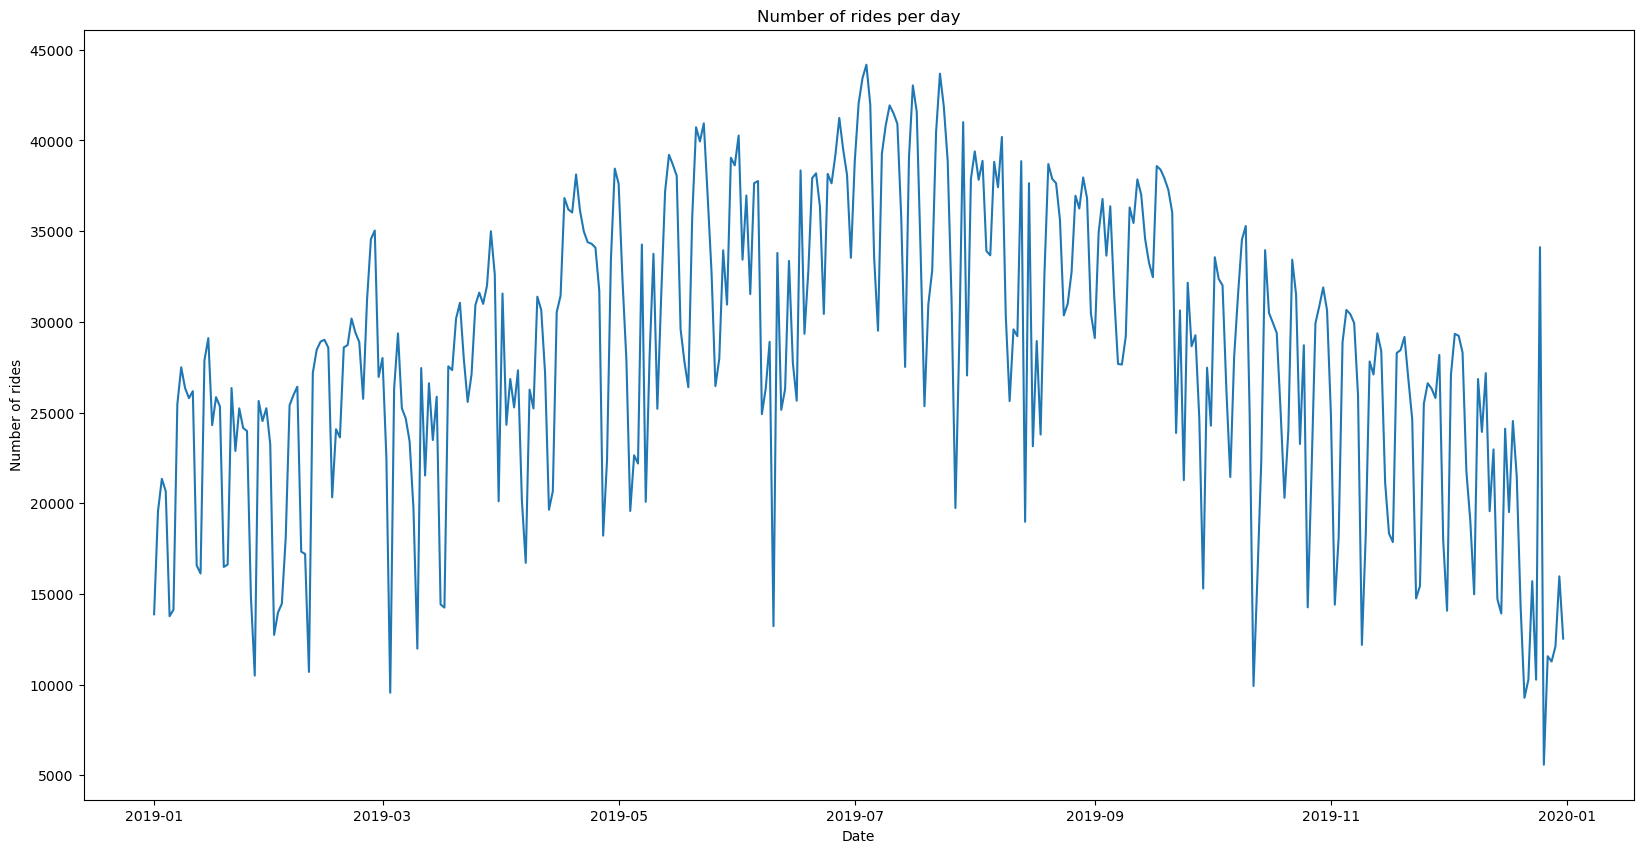

In [39]:
# Plot the number of rides per day
plt.figure(figsize=(20,10))
plt.plot(bike_data_2019_grouped_date.index, bike_data_2019_grouped_date['RidesPerDay'])
plt.xlabel('Date')
plt.ylabel('Number of rides')
plt.title('Number of rides per day')
plt.show()

              RidesPerDay
StartDayName             
Friday            1498069
Monday            1530343
Saturday          1231833
Sunday            1150968
Thursday          1621535
Tuesday           1624374
Wednesday         1652941


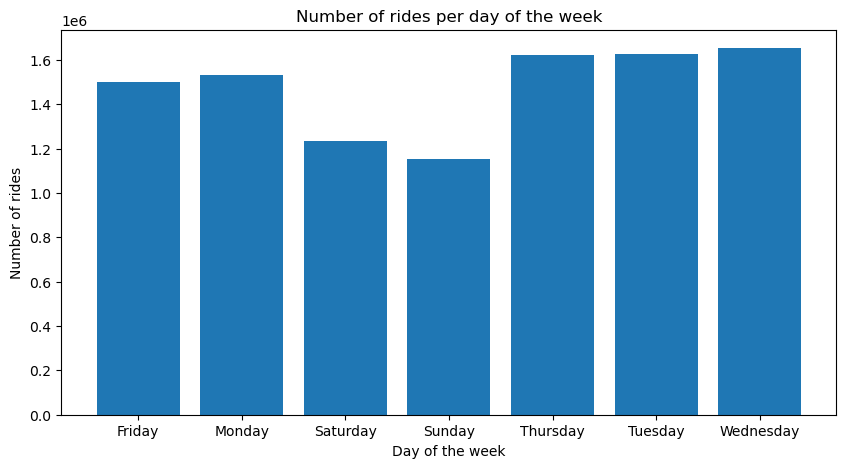

In [77]:
#plot the number of rides per day of the week using a bar chart
bike_data_2019_grouped_day = bike_data_2019.groupby('StartDayName').count()
bike_data_2019_grouped_day = bike_data_2019_grouped_day[['RentalID']]
bike_data_2019_grouped_day = bike_data_2019_grouped_day.rename(columns={'RentalID': 'RidesPerDay'})
print(bike_data_2019_grouped_day)

# Plot the number of rides per day
plt.figure(figsize=(10,5))
plt.bar(bike_data_2019_grouped_day.index, bike_data_2019_grouped_day['RidesPerDay'].values)
plt.xlabel('Day of the week')
plt.ylabel('Number of rides')
plt.title('Number of rides per day of the week')
plt.show()

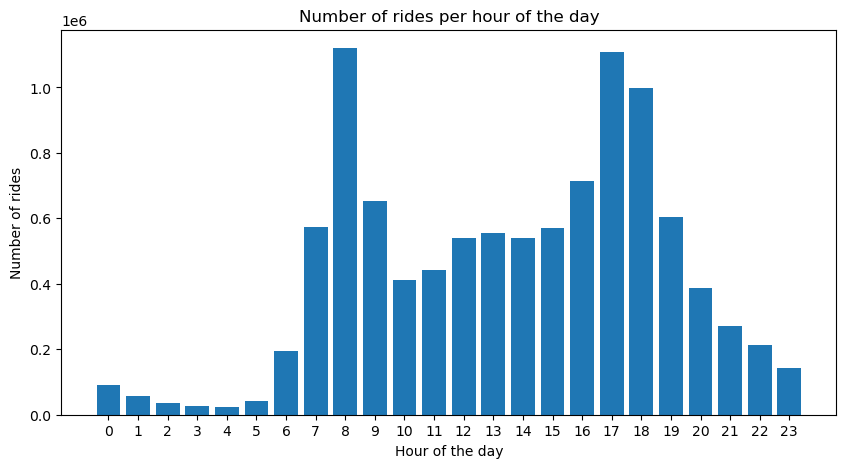

In [79]:
#plot the number of rides per hour of the day using a bar chart
bike_data_2019_grouped_hour = bike_data_2019.groupby('StartHour').count()
bike_data_2019_grouped_hour = bike_data_2019_grouped_hour[['RentalID']]
bike_data_2019_grouped_hour = bike_data_2019_grouped_hour.rename(columns={'RentalID': 'RidesPerHour'})

# create an array of the hours from 0 to 23
hours = np.arange(24)

# Plot the number of rides per day
plt.figure(figsize=(10,5))
plt.bar(bike_data_2019_grouped_hour.index, bike_data_2019_grouped_hour['RidesPerHour'].values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of rides')
plt.xticks(hours)
plt.title('Number of rides per hour of the day')
plt.show()

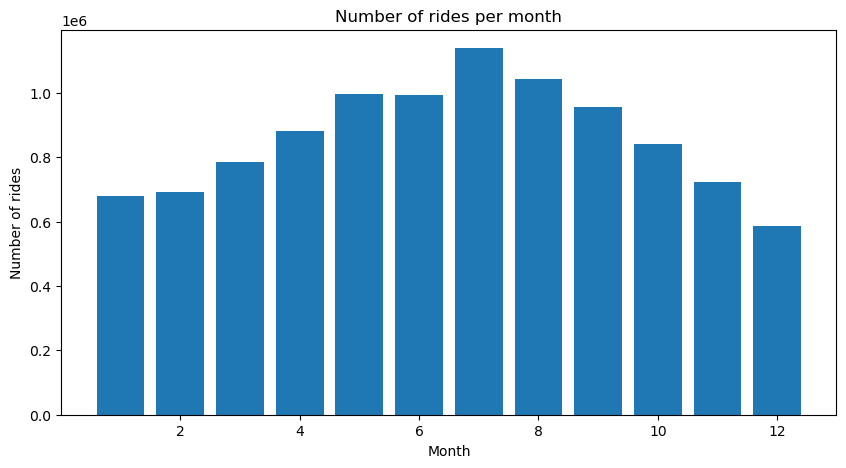

In [81]:
# plot the rides per month bar chart
bike_data_2019_grouped_month = bike_data_2019.groupby('StartMonth').count()
bike_data_2019_grouped_month = bike_data_2019_grouped_month[['RentalID']]
bike_data_2019_grouped_month = bike_data_2019_grouped_month.rename(columns={'RentalID': 'RidesPerMonth'})

# Plot the number of rides per day
plt.figure(figsize=(10,5))
plt.bar(bike_data_2019_grouped_month.index, bike_data_2019_grouped_month['RidesPerMonth'])
plt.xlabel('Month')
plt.ylabel('Number of rides')
plt.title('Number of rides per month')
plt.show()


In [83]:
# print in a table the highest number of rides per day of the week, per hour of the day and per month, and hightest number of rides per hour per day of the week
print('Highest number of rides per day of the week: ', bike_data_2019_grouped_day['RidesPerDay'].max())
print('Highest number of rides per hour of the day: ', bike_data_2019_grouped_hour['RidesPerHour'].max())
print('Highest number of rides per month: ', bike_data_2019_grouped_month['RidesPerMonth'].max())

# print the day of the week with the highest number of rides
print('Day of the week with the highest number of rides: ', bike_data_2019_grouped_day[bike_data_2019_grouped_day['RidesPerDay'] == bike_data_2019_grouped_day['RidesPerDay'].max()].index[0])

# print the hour of the day with the highest number of rides
print('Hour of the day with the highest number of rides: ', bike_data_2019_grouped_hour[bike_data_2019_grouped_hour['RidesPerHour'] == bike_data_2019_grouped_hour['RidesPerHour'].max()].index[0])

# print the month with the highest number of rides
print('Month with the highest number of rides: ', bike_data_2019_grouped_month[bike_data_2019_grouped_month['RidesPerMonth'] == bike_data_2019_grouped_month['RidesPerMonth'].max()].index[0])

Highest number of rides per day of the week:  1652941
Highest number of rides per hour of the day:  1120184
Highest number of rides per month:  1138703
Day of the week with the highest number of rides:  Wednesday
Hour of the day with the highest number of rides:  8
Month with the highest number of rides:  7


In [86]:
# print the station names with highest and lowest number of rides
print('Start Station with the highest number of rides: ', bike_data_2019['StartStationName'].value_counts().index[0])
print('Start Station with the lowest number of rides: ', bike_data_2019['StartStationName'].value_counts().index[-1])


Start Station with the highest number of rides:  Belgrove Street , King's Cross
Start Station with the lowest number of rides:  Thessaly Road North, Wandsworth Road


### Check for bikes that have not been returned in the same day
##### There is only 36618 rides from 9209471

In [64]:
different_dates = bike_data_2019[bike_data_2019['StartDate'] != bike_data_2019['EndDate']]
different_dates

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,StartDate,EndDate,Duration2
3013464,84683217,307380,12524,04/03/2019 15:01,341,"Craven Street, Strand",01/03/2019 01:38,354,"Northumberland Avenue, Strand",2019-03-01,2019-03-04,3 days
2904430,84683239,83520,7530,02/03/2019 01:02,61,"Great Dover Street, The Borough",01/03/2019 01:50,94,"Bricklayers Arms, Borough",2019-03-01,2019-03-02,1 days
2904447,84683241,83520,1499,02/03/2019 01:02,61,"Great Dover Street, The Borough",01/03/2019 01:50,94,"Bricklayers Arms, Borough",2019-03-01,2019-03-02,1 days
2994797,84683380,120600,3336,02/03/2019 14:13,309,"Embankment (Savoy), Strand",01/03/2019 04:43,229,"Whitehall Place, Strand",2019-03-01,2019-03-02,1 days
2997003,84688996,89880,6253,02/03/2019 09:43,541,"Green Park Station, Mayfair",01/03/2019 08:45,392,"Imperial College, Knightsbridge",2019-03-01,2019-03-02,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...
8940924,92634690,600,5635,01/11/2019 00:09,616,"Aintree Street, Fulham",31/10/2019 23:59,37,"Penywern Road, Earl's Court",2019-10-31,2019-11-01,1 days
8926186,92634684,480,9887,01/11/2019 00:07,485,"Old Ford Road, Bethnal Green",31/10/2019 23:59,282,"Royal London Hospital, Whitechapel",2019-10-31,2019-11-01,1 days
8903422,92634687,180,9827,01/11/2019 00:02,666,"Olympia Way, Olympia",31/10/2019 23:59,595,"Hammersmith Road, Hammersmith",2019-10-31,2019-11-01,1 days
8826866,92634686,1200,915,01/11/2019 00:19,357,"Howland Street, Fitzrovia",31/10/2019 23:59,65,"Gower Place , Euston",2019-10-31,2019-11-01,1 days


### Check if there is any date that have the start date after end date

In [57]:
# check if there is any end date that is before the start date
check_date = bike_data_2019[bike_data_2019['StartDate'] > bike_data_2019['EndDate']].count()

# get the rows where the end date is before the start date
different_dates = bike_data_2019[bike_data_2019['StartDate'] > bike_data_2019['EndDate']]

print(check_date,different_dates)

Rental Id            0
Duration             0
Bike Id              0
End Date             0
EndStation Id        0
EndStation Name      0
Start Date           0
StartStation Id      0
StartStation Name    0
StartDate            0
EndDate              0
dtype: int64 Empty DataFrame
Columns: [Rental Id, Duration, Bike Id, End Date, EndStation Id, EndStation Name, Start Date, StartStation Id, StartStation Name, StartDate, EndDate]
Index: []


### Check for missing dates

In [40]:
bike_data_2019['StartDate'] = pd.to_datetime(bike_data_2019['StartDate'])

# Create a sequence of all dates in the range of the data
date_range = pd.date_range(start=bike_data_2019['StartDate'].min().date(), end=bike_data_2019['StartDate'].max().date(), freq='D')

# Get the list of dates in the data
data_dates = bike_data_2019['StartDate'].dt.date.unique()

# Find the missing dates
missing_dates = date_range[~date_range.isin(data_dates)]

# Print the missing dates
print('Missing dates:')
print(missing_dates)

Missing dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### checking if there is any negative duration

In [44]:
duration = bike_data_2019.where(bike_data_2019['DurationMins'] < 0).count()

duration

RentalID            0
DurationMins        0
BikeID              0
EndTime             0
EndStationID        0
EndStationName      0
StartTime           0
StartStationID      0
StartStationName    0
StartDate           0
EndDate             0
StartDay            0
StartMonth          0
StartYear           0
EndDay              0
EndMonth            0
EndYear             0
StartDayOfWeek      0
EndDayOfWeek        0
StartHour           0
EndHour             0
StartDayName        0
EndDayName          0
dtype: int64

### plotting the boxplot for the different dates rides

               Start Date          End Date  Duration
3013464  01/03/2019 01:38  04/03/2019 15:01    307380
2904430  01/03/2019 01:50  02/03/2019 01:02     83520
2904447  01/03/2019 01:50  02/03/2019 01:02     83520
2994797  01/03/2019 04:43  02/03/2019 14:13    120600
2997003  01/03/2019 08:45  02/03/2019 09:43     89880
...                   ...               ...       ...
8940924  31/10/2019 23:59  01/11/2019 00:09       600
8926186  31/10/2019 23:59  01/11/2019 00:07       480
8903422  31/10/2019 23:59  01/11/2019 00:02       180
8826866  31/10/2019 23:59  01/11/2019 00:19      1200
8811702  31/10/2019 23:59  01/11/2019 00:12       780

[36618 rows x 3 columns]


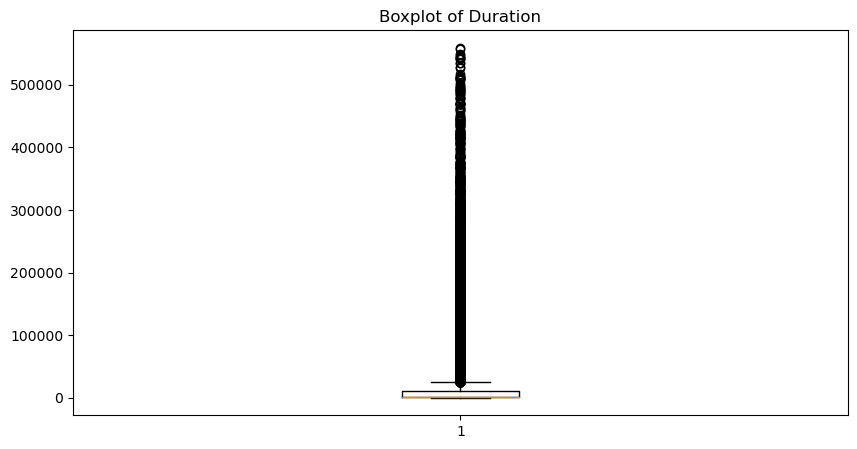

In [75]:
print(different_dates[['Start Date', 'End Date', 'Duration']])

different_dates['Duration'].describe()

# plot the boxplot of the duration
plt.figure(figsize=(10, 5))
plt.boxplot(different_dates['Duration'])
plt.title('Boxplot of Duration')    
plt.show()


In [143]:
# add a new column called 'BankHoliday' to the dataframe and set it to 0 for all rows
bike_data_2019['BankHoliday'] = 0

# set BankHoliday to 1 for specified dates
bank_holidays = [
    '2019-12-26', '2019-12-25', '2019-08-26', '2019-05-27',
    '2019-05-06', '2019-04-22', '2019-04-19', '2019-01-01'
]
bike_data_2019.loc[bike_data_2019['StartDate'].isin(bank_holidays), 'BankHoliday'] = 1
bike_data_2019.head()

,RentalID,DurationMins,BikeID,EndTime,EndStationID,EndStationName,StartTime,StartStationID,StartStationName,StartDate,...,EndDay,EndMonth,EndYear,StartDayOfWeek,EndDayOfWeek,StartHour,EndHour,StartDayName,EndDayName,BankHoliday
4218326,83255488,1680,8652,01/01/2019 00:28,228,"St. James's Square, St. James's",01/01/2019 00:00,228,"St. James's Square, St. James's",2019-01-01,...,1,1,2019,1,1,0,0,Tuesday,Tuesday,1
4218400,83255489,1620,13492,01/01/2019 00:27,228,"St. James's Square, St. James's",01/01/2019 00:00,228,"St. James's Square, St. James's",2019-01-01,...,1,1,2019,1,1,0,0,Tuesday,Tuesday,1
4216956,83255490,480,13770,01/01/2019 00:08,212,"Campden Hill Road, Notting Hill",01/01/2019 00:00,155,"Lexham Gardens, Kensington",2019-01-01,...,1,1,2019,1,1,0,0,Tuesday,Tuesday,1
4206683,83255494,6000,5063,01/01/2019 01:41,188,"Nutford Place, Marylebone",01/01/2019 00:01,44,"Bruton Street, Mayfair",2019-01-01,...,1,1,2019,1,1,0,1,Tuesday,Tuesday,1
4212866,83255498,780,7944,01/01/2019 00:14,146,"Vauxhall Bridge , Pimlico",01/01/2019 00:01,419,"Chelsea Bridge, Pimlico",2019-01-01,...,1,1,2019,1,1,0,0,Tuesday,Tuesday,1


In [146]:
# print value counts for the BankHoliday column
checking_for_null_values_and_data_types = bike_data_2019['BankHoliday'].value_counts()
checking_for_null_values_and_data_types

0    10102569
1      207494
Name: BankHoliday, dtype: int64

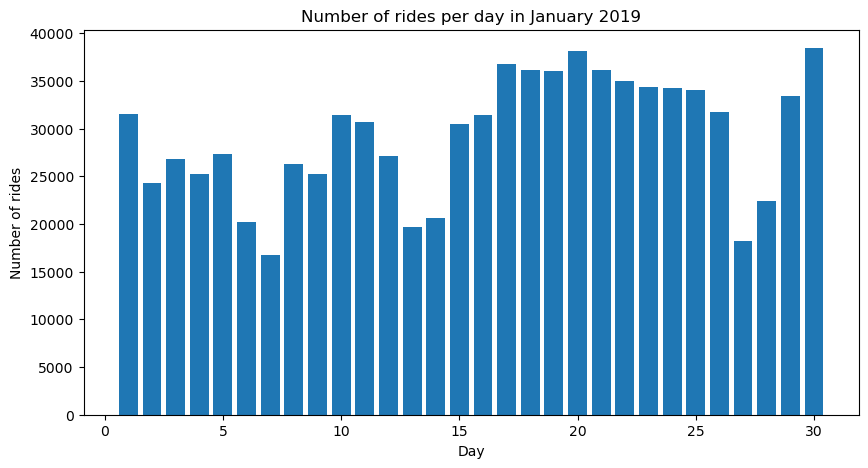

In [152]:
#plot january 2019 per day
bike_data_2019_january = bike_data_2019[bike_data_2019['StartMonth'] == 1]
bike_data_2019_january_grouped_day = bike_data_2019_january.groupby('StartDay').count()
bike_data_2019_january_grouped_day = bike_data_2019_january_grouped_day[['RentalID']]
bike_data_2019_january_grouped_day = bike_data_2019_january_grouped_day.rename(columns={'RentalID': 'RidesPerDay'})

# Plot the number of rides per day
plt.figure(figsize=(10,5))
plt.bar(bike_data_2019_january_grouped_day.index, bike_data_2019_january_grouped_day['RidesPerDay'])
plt.xlabel('Day')
plt.ylabel('Number of rides')
plt.title('Number of rides per day in January 2019')
plt.show()


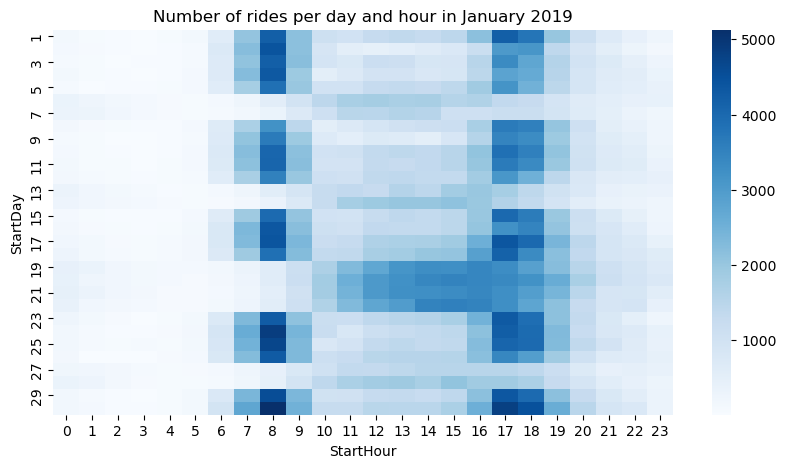

In [160]:
#plot heatmap of january 2019 per day and hour
bike_data_2019_january = bike_data_2019[bike_data_2019['StartMonth'] == 1]
bike_data_2019_january_grouped_day_hour = bike_data_2019_january.groupby(['StartDay', 'StartHour']).count()
bike_data_2019_january_grouped_day_hour = bike_data_2019_january_grouped_day_hour[['RentalID']]
bike_data_2019_january_grouped_day_hour = bike_data_2019_january_grouped_day_hour.rename(columns={'RentalID': 'RidesPerDayHour'})
bike_data_2019_january_grouped_day_hour = bike_data_2019_january_grouped_day_hour.reset_index()

# create a pivot table
bike_data_2019_january_grouped_day_hour_pivot = bike_data_2019_january_grouped_day_hour.pivot(index='StartDay', columns='StartHour', values='RidesPerDayHour')

# plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(bike_data_2019_january_grouped_day_hour_pivot, cmap='Blues')
plt.title('Number of rides per day and hour in January 2019')
plt.show()


# Get bike points

In [45]:
import requests
import pandas as pd

In [46]:
def get_bike_points():
    
    try:
        response = requests.get("https://api.tfl.gov.uk/BikePoint/")
        
        response.raise_for_status()
        
        res = response.json()
        
        data = []
        
        for x in res:
            
            #edit the id column name to BikePointId
            x['BikePointId'] = x.pop('id')
            x['BikeStationName'] = x.pop('commonName')
            x['StationLongitude'] = x.pop('lon')
            x['StationLatitude'] = x.pop('lat')
            
            #drop other columns
            x.pop('placeType')
            x.pop('children')
            x.pop('childrenUrls')
            x.pop('url')
            x.pop('$type')
            
            for additionalProperty in x['additionalProperties']:
                if additionalProperty['key'] == 'NbBikes':
                    x['NbBikes'] = additionalProperty['value']
                elif additionalProperty['key'] == 'NbEmptyDocks':
                    x['NbEmptyDocks'] = additionalProperty['value']
                elif additionalProperty['key'] == 'NbDocks':
                    x['NbDocks'] = additionalProperty['value']
                elif additionalProperty['key'] == 'NbEBikes':
                    x['NbEBikes'] = additionalProperty['value']
                elif additionalProperty['key'] == 'NbStandardBikes':
                    x['nbStandardBikes'] = additionalProperty['value']
            
            x.pop('additionalProperties')
                    
            data.append(x)
                
        return pd.DataFrame(data)    
        
                
    
    except requests.exceptions.HTTPError as err:
        print(err)
        return None

In [47]:
bike_points = get_bike_points()
print(bike_points.columns)

Index(['BikePointId', 'BikeStationName', 'StationLongitude', 'StationLatitude',
       'NbBikes', 'NbEmptyDocks', 'NbDocks', 'nbStandardBikes', 'NbEBikes'],
      dtype='object')


In [48]:
## save dataframe to csv file
file_path = 'BikePoints.csv'
bike_points.to_csv(file_path, index=False)

In [49]:
bike_points.head()
# bike_points.drop('$type', axis=1, inplace=True)

,BikePointId,BikeStationName,StationLongitude,StationLatitude,NbBikes,NbEmptyDocks,NbDocks,nbStandardBikes,NbEBikes
0,BikePoints_1,"River Street , Clerkenwell",-0.109970,51.529163,9,10,19,9,0
1,BikePoints_2,"Phillimore Gardens, Kensington",-0.197574,51.499606,18,19,37,18,0
2,BikePoints_3,"Christopher Street, Liverpool Street",-0.084605,51.521283,27,5,32,25,2
3,BikePoints_4,"St. Chad's Street, King's Cross",-0.120973,51.530059,22,1,23,22,0
4,BikePoints_5,"Sedding Street, Sloane Square",-0.156876,51.493130,17,10,27,17,0


In [51]:
# # check if startstationname and endstationname are in the bike_points dataframe
# print(bike_data_2019['StartStationName'].isin(bike_points['BikeStationName']).value_counts())

# get the unique values of startstationname and endstationname and BikeStationName
start_station = bike_data_2019['StartStationName'].unique()
end_station = bike_data_2019['EndStationName'].unique()
bike_station = bike_points['BikeStationName'].unique()
print(len(start_station), len(end_station), len(bike_station))    


801 801 799
Stations that are in the bike_data_2019 dataframe but not in the bike_points dataframe:
34
36
{'Paddington Green Police Station, Paddington', 'Exhibition Road Museums, South Kensington', 'Hampstead Road (Cartmel), Euston', 'One Tower Bridge, Bermondsey', 'Thessaly Road North, Wandsworth Road', 'Manfred Road, East Putney', 'Harrington Square 2, Camden Town', 'Wellington Street , Strand', 'Oval Way, Vauxhall', "Regent's Row , Haggerston ", "St Mary's Hospital, Westminster", 'Tavistock Street, Covent Garden', 'Bradmead, Battersea Park', "Westfield Library Corner, Shepherd's Bush", 'New North Road 1, Hoxton', 'Alfred Place, Bloomsbury', 'The Green Bridge, Mile End', 'Cadogan Place, Knightsbridge', 'Stockwell Roundabout, Stockwell', 'Castalia Square, Cubitt Town', 'Christian Street, Whitechapel', 'Hammersmith Town Hall, Hammersmith', 'Great Marlborough Street, Soho', 'Maclise Road, Olympia', 'Winsland Street, Paddington', 'Rossmore Road, Marylebone', 'Olympia Way, Olympia', 'Thu

array(['Castalia Square, Cubitt Town'], dtype=object)

In [52]:
hampstead2 = bike_data_2019[bike_data_2019['StartStationName'] == 'Castalia Square, Cubitt Town']


hampstead = bike_points[bike_points['BikeStationName'] == 'Castalia Square, Cubitt Town']

print(hampstead2['StartStationName'].unique(),hampstead['BikeStationName'].unique())

['Castalia Square, Cubitt Town'] []


 {'Harrington Square 2, Camden Town', 'Lansdowne Way Bus Garage, Stockwell', 'Castalia Square, Cubitt Town', 
  'Jubilee Gardens, South Bank', 'Stockwell Roundabout, Stockwell', 'Cadogan Place, Knightsbridge', 
  'Queensway, Westminster', "Regent's Row , Haggerston ", 'Bevington Road, North Kensington', 'Alfred Place, Bloomsbury', 
  'Hammersmith Town Hall, Hammersmith', 'Pop Up Dock 1', 'The Green Bridge, Mile End', 'One Tower Bridge, Bermondsey', 
  'Manfred Road, East Putney', 'New North Road 1, Hoxton', 'Hampstead Road (Cartmel), Euston', 'Winsland Street, Paddington', 
 'Oval Way, Vauxhall', 'Bradmead, Battersea Park', 'Rossmore Road, Marylebone', 'Maclise Road, Olympia', 
 'Walworth Road, Elephant & Castle', 'Exhibition Road Museums, South Kensington', "St Mary's Hospital, Westminster", 
  "Westfield Library Corner, Shepherd's Bush", 'Thessaly Road North, Wandsworth Road', 'Great Marlborough Street, Soho', 
  'Ashmole Estate, Oval', 'Christian Street, Whitechapel', 'Ferndale Road, Brixton. ', 'Thurtle road, Haggerston',  'Kennington Lane Tesco, Vauxhall', 'Tavistock Street, Covent Garden', 'Olympia Way, Olympia',  'Paddington Green Police Station, Paddington'}


In [53]:
# print statistics for bike_points dataframe
bike_points.describe()


,StationLongitude,StationLatitude
count,799.000000,799.000000
mean,-0.127083,51.505884
std,0.055069,0.020283
min,-0.236769,51.454752
25%,-0.171144,51.492976
50%,-0.128279,51.508981
75%,-0.090533,51.520876
max,-0.002275,51.549369


In [55]:
calc_stats(bike_points)
checking_for_null_values_and_data_types(bike_points)

,Mean,Median,Min,Max
StationLongitude,-0.127,-0.128,-0.237,-0.002
StationLatitude,51.506,51.509,51.455,51.549


In [56]:
bike_points.dtypes

BikePointId          object
BikeStationName      object
StationLongitude    float64
StationLatitude     float64
NbBikes              object
NbEmptyDocks         object
NbDocks              object
nbStandardBikes      object
NbEBikes             object
dtype: object

In [131]:
# change type of NbBikes, NbEmptyDocks, NbDocks, NbEBikes, NbStandardBikes to int
bike_points['NbBikes'] = bike_points['NbBikes'].astype(int)
bike_points['NbEmptyDocks'] = bike_points['NbEmptyDocks'].astype(int)
bike_points['NbDocks'] = bike_points['NbDocks'].astype(int)
bike_points['NbEBikes'] = bike_points['NbEBikes'].astype(int)
bike_points['nbStandardBikes'] = bike_points['nbStandardBikes'].astype(int)

#Print sum of nbBikes, nbEmptyDocks, nbDocks, nbEBikes, nbStandardBikes
print('Sum of nbBikes: ', bike_points['NbBikes'].sum())
print('Sum of nbEmptyDocks: ', bike_points['NbEmptyDocks'].sum())
print('Sum of nbDocks: ', bike_points['NbDocks'].sum())
print('Sum of nbEBikes: ', bike_points['NbEBikes'].sum())
print('Sum of nbStandardBikes: ', bike_points['nbStandardBikes'].sum())

#print unique values of NbBikes, NbEmptyDocks, NbDocks, NbEBikes, NbStandardBikes
print('Unique values of NbBikes: ', bike_points['NbBikes'].unique())
print('Unique values of NbEmptyDocks: ', bike_points['NbEmptyDocks'].unique())
print('Unique values of NbDocks: ', bike_points['NbDocks'].unique())
print('Unique values of NbEBikes: ', bike_points['NbEBikes'].unique())
print('Unique values of NbStandardBikes: ', bike_points['nbStandardBikes'].unique())

Sum of nbBikes:  10679
Sum of nbEmptyDocks:  10421
Sum of nbDocks:  21100
Sum of nbEBikes:  333
Sum of nbStandardBikes:  10346
Unique values of NbBikes:  [ 0  9  8  6  5  1 12  7 13 10 14 15  4 11 16  2  3 17 18 19 20 21 22 23
 24 25 27 28 26 30 29 31 32 33 36 35 34 37 38 41 49 45 42 44 52 63 59]
Unique values of NbEmptyDocks:  [ 0  1  2  4  8 13  5  6  7 10 11 14  3 15  9 12 16 17 18 19 21 20 22 24
 23 25 26 27 28 29 30 33 31 32 34 37 36 35 38 39 42 45 46 52 44]
Unique values of NbDocks:  [ 0 10 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 54 55 56 57 60 63
 64]
Unique values of NbEBikes:  [0 1 2 3 6 5 4]
Unique values of NbStandardBikes:  [ 0  9  8  6  5  1  7 12 10  4 13 14 15 11 16  2  3 17 18 19 20 21 22 23
 24 25 27 26 28 30 29 32 33 35 31 34 37 36 38 41 48 44 42 43 40 49 62 58]


In [135]:
# show summary statistics for the bike_points objects columns
bike_points.describe()

,StationLongitude,StationLatitude,NbBikes,NbEmptyDocks,NbDocks,nbStandardBikes,NbEBikes
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,-0.127083,51.505884,13.365457,13.042553,26.408010,12.948686,0.416771
std,0.055069,0.020283,9.864196,9.164642,8.896156,9.771634,0.778965
min,-0.236769,51.454752,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.171144,51.492976,5.000000,5.000000,20.000000,5.000000,0.000000
50%,-0.128279,51.508981,12.000000,12.000000,24.000000,11.000000,0.000000
75%,-0.090533,51.520876,19.000000,19.000000,30.000000,19.000000,1.000000
max,-0.002275,51.549369,63.000000,52.000000,64.000000,62.000000,6.000000


In [72]:
bike_points.head()

,BikePointId,BikeStationName,StationLongitude,StationLatitude,NbBikes,NbEmptyDocks,NbDocks,nbStandardBikes,NbEBikes
0,BikePoints_1,"River Street , Clerkenwell",-0.109970,51.529163,9,10,19,9,0
1,BikePoints_2,"Phillimore Gardens, Kensington",-0.197574,51.499606,18,19,37,18,0
2,BikePoints_3,"Christopher Street, Liverpool Street",-0.084605,51.521283,27,5,32,25,2
3,BikePoints_4,"St. Chad's Street, King's Cross",-0.120973,51.530059,22,1,23,22,0
4,BikePoints_5,"Sedding Street, Sloane Square",-0.156876,51.493130,17,10,27,17,0


In [95]:
# print all stations that are in the bike_points dataframe but not in the bike_data_2019 dataframe and vice versa
print('Stations that are in the bike_points dataframe but not in the bike_data_2019 dataframe:')
print(len(set(bike_station) - set(start_station)))
print(len(set(end_station) - set(bike_station)))

print('Stations that are in the bike_data_2019 dataframe but not in the bike_points dataframe:')
print(len(set(start_station) - set(bike_station)))
print(len(set(end_station) - set(bike_station)))

# get station IDs for the stations that are in the bike_points dataframe but not in the bike_data_2019 dataframe
print('Station IDs for the stations that are in the bike_data_2019 dataframe but not in the bike_points dataframe:')
print(bike_data_2019[bike_data_2019['StartStationName'].isin(set(start_station) - set(bike_station))]['StartStationID'].unique())
print(bike_data_2019[bike_data_2019['EndStationName'].isin(set(end_station) - set(bike_station))]['EndStationID'].unique())

print('Stations that are in the bike_points dataframe but not in the bike_data_2019 dataframe:')
print((set(bike_station) - set(start_station)))
print((set(end_station) - set(bike_station)))

Stations that are in the bike_points dataframe but not in the bike_data_2019 dataframe:
34
36
Stations that are in the bike_data_2019 dataframe but not in the bike_points dataframe:
36
36
Station IDs for the stations that are in the bike_data_2019 dataframe but not in the bike_points dataframe:
[ 21 408 211 338 553 335 432 159 425 463 492 305 290 818 411 808 666 753
 687 489 832 364 752 591 794 614 805 474 252 355 760 327 778 725 224]
[687 832 290 411 432 818 489 553 211 463 338 492 666 364 425 335 591 752
 159  21 614 794 327 753 808 355 305 252 474 408 760 805 725 778 224]
Stations that are in the bike_points dataframe but not in the bike_data_2019 dataframe:
{'Sun Street, Liverpool Street', 'Clifford Street, Mayfair', "St Mary's Hospital, Paddington", 'Store Street, Bloomsbury', "Regent's Row , Haggerston", 'Queensway, Kensington Gardens', 'Crimscott Street, Bermondsey', 'Victoria Rise, Clapham Common', 'Portugal Street, Holborn', 'London Fields, Hackney Central', 'Exhibition Road M

In [128]:
# get the station name for the highest nbDocks 
print('Station name for the highest nbDocks: ', bike_points[bike_points['NbDocks'] == bike_points['NbDocks'].max()]['BikeStationName'].unique())

# get the station name for the lowest nbDocks
print('Station name for the lowest nbDocks: ', bike_points[bike_points['NbDocks'] == bike_points['NbDocks'].min()]['BikeStationName'].unique())


Station name for the highest nbDocks:  ['Aquatic Centre, Queen Elizabeth Olympic Park'
 'Edgware Road Station, Marylebone']
Station name for the lowest nbDocks:  ['Colombo Street, Southwark']


In [134]:
# get station names with ebikes
print('Station names with ebikes: ', len(bike_points[bike_points['NbEBikes'] > 0]['BikeStationName'].unique()) )


Station names with ebikes:  234


<Axes: >

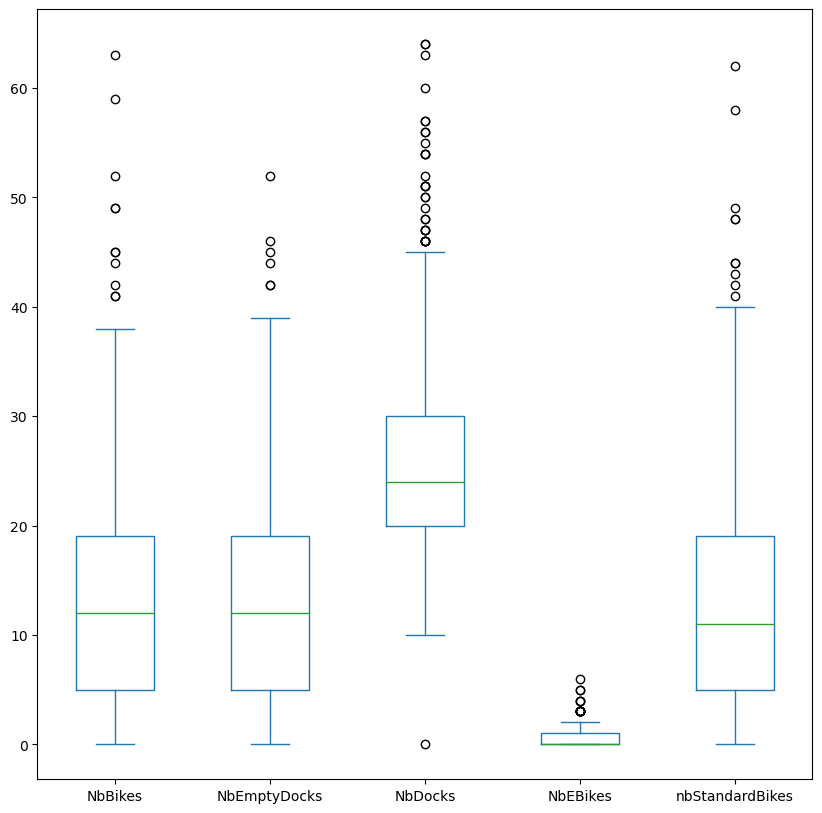

In [136]:
# plot boxplot for nbBikes, nbEmptyDocks, nbDocks, nbEBikes, nbStandardBikes
bike_points[['NbBikes', 'NbEmptyDocks', 'NbDocks', 'NbEBikes', 'nbStandardBikes']].plot(kind='box', figsize=(10, 10))


In [141]:
# print count of rows for value 0 in nbBikes, nbEmptyDocks, nbDocks, nbEBikes, nbStandardBikes
print('Count of rows for value 0 in nbBikes: ', len(bike_points[bike_points['NbBikes'] == 0]))
print('Count of rows for value 0 in nbEmptyDocks: ', len(bike_points[bike_points['NbEmptyDocks'] == 0]))
print('Count of rows for value 0 in nbDocks: ', len(bike_points[bike_points['NbDocks'] == 0]))
print('Count of rows for value 0 in nbEBikes: ', len(bike_points[bike_points['NbEBikes'] == 0]))
print('Count of rows for value 0 in nbStandardBikes: ', len(bike_points[bike_points['nbStandardBikes'] == 0]))



Count of rows for value 0 in nbBikes:  17
Count of rows for value 0 in nbEmptyDocks:  34
Count of rows for value 0 in nbDocks:  1
Count of rows for value 0 in nbEBikes:  565
Count of rows for value 0 in nbStandardBikes:  26
